In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

#@hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_abc2f642b8b24a62b596c6fe7372f591 = ibm_boto3.client(service_name='****',
    ibm_api_key_id='****',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

###311 Dataset
body = client_abc2f642b8b24a62b596c6fe7372f591.get_object(Bucket='****',Key='fhrw-4uyv (2).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_311 = pd.read_csv(body)

###Brooklyn
body1 = client_abc2f642b8b24a62b596c6fe7372f591.get_object(Bucket='****',Key='BK_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_BS = pd.read_csv(body1)

###Bronx
body2 = client_abc2f642b8b24a62b596c6fe7372f591.get_object(Bucket='****',Key='BX_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_BX = pd.read_csv(body2)

###Manhattan
body3 = client_abc2f642b8b24a62b596c6fe7372f591.get_object(Bucket='****',Key='MN_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_MN = pd.read_csv(body3)

###Queens
body4 = client_abc2f642b8b24a62b596c6fe7372f591.get_object(Bucket='****',Key='QN_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_QN = pd.read_csv(body4)

###Staten Island
body5 = client_abc2f642b8b24a62b596c6fe7372f591.get_object(Bucket='****',Key='SI_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_SI = pd.read_csv(body5)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,24,25,26,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (20,23,24,26,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,77) have mixed types. Specify dtype 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Selecting appropriate fields from the pluto data
fields = ['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 
          'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 
          'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']

df_BS = df_BS[fields]
df_BX = df_BX[fields]
df_MN = df_MN[fields]
df_QN = df_QN[fields]
df_SI = df_SI[fields]

#Creating one dataframe containing data on the buildings
df_bldg = pd.concat([df_BS, df_BX, df_MN, df_QN, df_SI])  

#Since we compare the buildings with the complaint on the basis of the address, those rows without a valid address are dropped
df_bldg.dropna(subset = ['Address'], axis = 0, inplace = True) 
df_bldg.reset_index(drop=True, inplace=True)  #Resetting indicies
df_bldg.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,JOHN STREET,0,0.0,0.00,2.0,0.0,1,151930,337.42,0,0.0,0,0,0.0,0,0,0,11201.0,NaN,NaN
1,10 JAY STREET,163894,195.0,8.33,2.0,6.5,50,19682,207.25,1,10.0,147505,0,5.4,16389,1920,1994,11201.0,195989.0,987838.0
2,1 JOHN STREET,102534,0.0,0.00,2.0,0.0,7501,0,0.00,1,12.0,0,97848,0.0,4686,0,0,11201.0,195992.0,987624.0
3,JAY STREET,0,0.0,0.00,2.0,0.0,1,387060,469.00,15,0.0,0,0,0.0,0,0,0,11201.0,196151.0,988568.0
4,JAY STREET,0,0.0,0.00,2.0,0.0,5,6384,0.00,0,0.0,0,0,0.0,0,0,0,11201.0,NaN,NaN


Taking a data overview to establish approach

In [4]:
df_311.dtypes

created_date               object
unique_key                  int64
complaint_type             object
incident_zip              float64
incident_address           object
street_name                object
address_type               object
city                       object
resolution_description     object
borough                    object
latitude                  float64
longitude                 float64
closed_date                object
location_type              object
status                     object
dtype: object

In [5]:
df_bldg.dtypes

Address        object
BldgArea        int64
BldgDepth     float64
BuiltFAR      float64
CommFAR       float64
FacilFAR      float64
Lot             int64
LotArea         int64
LotDepth      float64
NumBldgs        int64
NumFloors     float64
OfficeArea      int64
ResArea         int64
ResidFAR      float64
RetailArea      int64
YearBuilt       int64
YearAlter1      int64
ZipCode       float64
YCoord        float64
XCoord        float64
dtype: object

# Model to predict the number of complaints

The objective is to build a model to predict the number of future complaints of a given complaint type, in specific, the top complaint type identified in Question 1: heating/hot water

Hence, we can start by trying to observe trends in 311 data related to the top complaint

We can drop status, resolution description and closed date since they are not expected to play into the creation of complaints

In order to simplify the analysis, instead of considering many different features relaying the location of the complaint, only the zip code, location type and borough data will be kept, and the others will be dropped

Also, to make the data trends with time easier to understand, the created date will be simplified to month and year data

In [6]:
df_311_2 = df_311.loc[:,['created_date', 'unique_key', 'complaint_type', 'incident_zip', 'location_type', 'borough']] #taking dataframe with relevant details

#fixing datatype
df_311_2['created_date'] = pd.to_datetime(df_311['created_date']).dt.to_period('M')
df_311_2['complaint_type'] = df_311['complaint_type'].astype('category')
df_311_2['incident_zip'] = df_311['incident_zip'].astype('category')
df_311_2['borough'] = df_311['borough'].astype('category')
df_311_2['location_type'] = df_311['location_type'].astype('category')

#Taking complaints created before 31 Dec 2018
df_311_2 = df_311_2[df_311_2['created_date'] < pd.datetime(2019,1,1)]

#Taking top complaint as determined in Question 1
df_top_comp = pd.concat([df_311_2[df_311_2['complaint_type'] == 'HEATING'], df_311_2[df_311_2['complaint_type'] == 'HEAT/HOT WATER']])

#Dropping invalid data
df_top_comp = df_top_comp.dropna()
df_top_comp.reset_index(drop=True, inplace=True)
df_top_comp.head()

,created_date,unique_key,complaint_type,incident_zip,location_type,borough
0,2012-04,23060277,HEATING,10034.0,RESIDENTIAL BUILDING,MANHATTAN
1,2012-04,23059409,HEATING,10025.0,RESIDENTIAL BUILDING,MANHATTAN
2,2012-04,23059006,HEATING,10034.0,RESIDENTIAL BUILDING,MANHATTAN
3,2012-04,23052646,HEATING,10038.0,RESIDENTIAL BUILDING,MANHATTAN
4,2012-04,23051271,HEATING,10034.0,RESIDENTIAL BUILDING,MANHATTAN


In [7]:
#Checking data
df_top_comp.isna().sum()

created_date      0
unique_key        0
complaint_type    0
incident_zip      0
location_type     0
borough           0
dtype: int64

In [8]:
df_top_comp.borough.unique()

[MANHATTAN, QUEENS, BRONX, BROOKLYN, STATEN ISLAND, Unspecified]
Categories (6, object): [MANHATTAN, QUEENS, BRONX, BROOKLYN, STATEN ISLAND, Unspecified]

In [9]:
#Cleaning data by dropping rows with the borough unspecified
df_top_comp.drop(df_top_comp[df_top_comp['borough'] == 'Unspecified'].index, inplace = True)
df_top_comp.reset_index(drop=True, inplace=True)
df_top_comp['borough'].unique()

[MANHATTAN, QUEENS, BRONX, BROOKLYN, STATEN ISLAND]
Categories (5, object): [MANHATTAN, QUEENS, BRONX, BROOKLYN, STATEN ISLAND]

Visulaizing data

In [10]:
complaints_over_time = df_top_comp.groupby(['created_date'])['unique_key'].count()
complaints_over_time.head()

created_date
2010-01    24
2010-02     6
2010-03    18
2010-04     5
2010-05     3
Freq: M, Name: unique_key, dtype: int64

Text(0, 0.5, 'Number of Complaints')

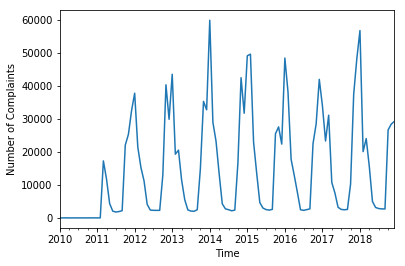

In [11]:
complaints_over_time.plot()
plt.xlabel('Time')
plt.ylabel('Number of Complaints')

There is a clear seasonal trend observable, which makes sense since complaints regarding heating would be more likley in colder seasons

In [12]:
#Modifying Data accordingly and making month and year separate categorical variables
df_top_comp['year'] = df_top_comp['created_date'].dt.year
df_top_comp['month'] = df_top_comp['created_date'].dt.month
df_top_comp['month'].head()

0    4
1    4
2    4
3    4
4    4
Name: month, dtype: int64

In [13]:
complaints_over_months = df_top_comp.groupby(['month'])['unique_key'].count()
complaints_over_months.head()

month
1    329411
2    200809
3    172170
4    100427
5     43120
Name: unique_key, dtype: int64

Text(0, 0.5, 'Number of Complaints')

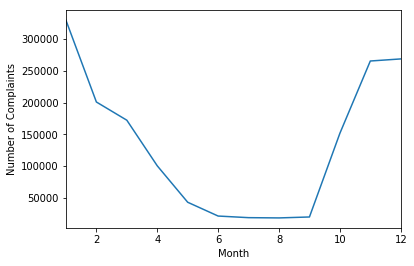

In [14]:
complaints_over_months.plot()
plt.xlabel('Month')
plt.ylabel('Number of Complaints')

Text(0, 0.5, 'Number of Complaints')

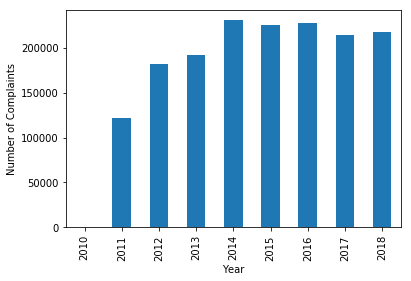

In [15]:
df_top_comp.groupby(['year'])['unique_key'].count().plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')

In [16]:
#Since the data for 2010 and part of 2011 is incomplete, we can drop that year from our model
df_top_comp = df_top_comp[df_top_comp['created_date'] > pd.datetime(2011,1,31)]

In [17]:
complaints_over_locType = df_top_comp.groupby(['location_type'])['unique_key'].count()
complaints_over_locType.head()

location_type
Apartment                     0
Building-Wide                 0
Public Area                   0
RESIDENTIAL BUILDING    1609990
Residential Building          0
Name: unique_key, dtype: int64

Text(0.5, 0, 'Number of Complaints')

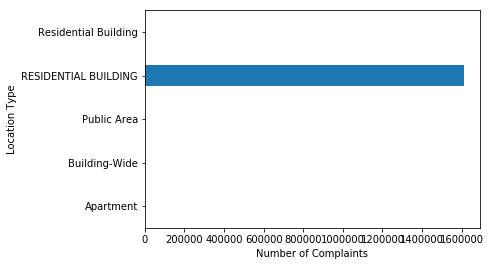

In [18]:
complaints_over_locType.plot(kind = 'barh')
plt.ylabel('Location Type')
plt.xlabel('Number of Complaints')

There is a clear co-relation observable, with almost all complaints coming from residential buldings

In [19]:
complaints_over_zip = df_top_comp.groupby(['incident_zip'])['unique_key'].count()
complaints_over_zip.head()

incident_zip
10001.0     2970
10002.0    10952
10003.0     8636
10004.0      120
10005.0      153
Name: unique_key, dtype: int64

Text(0, 0.5, 'Number of Complaints')

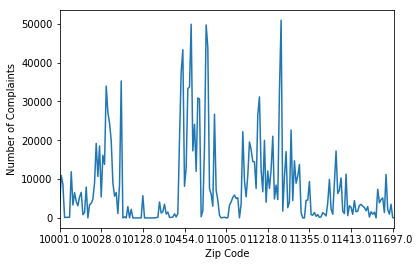

In [20]:
complaints_over_zip.plot()
plt.xlabel('Zip Code')
plt.ylabel('Number of Complaints')

There isn't a consistent trend in ZIP codes since they are arbitarily assigned numbers. To make it more suitable for our model, instead of diving these zip codes in bins and working with those categories, we can directly just use the boroughs which can relay location information as well. 

In [21]:
complaints_over_borough = df_top_comp.groupby(['borough'])['unique_key'].count()
complaints_over_borough.head()

borough
BRONX            520461
BROOKLYN         498760
MANHATTAN        365735
QUEENS           209160
STATEN ISLAND     15874
Name: unique_key, dtype: int64

Text(0, 0.5, 'Number of Complaints')

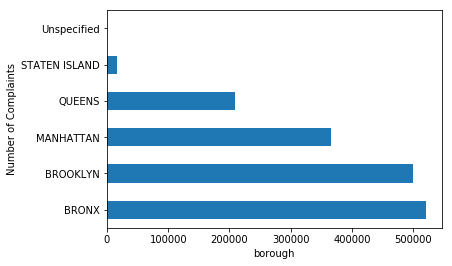

In [22]:
complaints_over_borough.plot(kind = 'barh')
plt.xlabel('borough')
plt.ylabel('Number of Complaints')

There is a clear relation between the borough and the number of complaints. 

So, we can drop the zip codes

In [23]:
df_top_comp.drop('incident_zip', axis = 1, inplace = True)

Building Model

We have determined that the categorical values of month, zip code, borough and location type factor into the number of complaints regarding heating reported

Considering that we have to predict a continuous value (number of complaints) given categorical values, we use an appropriate regression model

We need to first shape the data into features and target variables

In [24]:
#Finding the number of complaints given year, month, borough and location type

no_of_comp = df_top_comp[['unique_key', 'year','month','borough','location_type']].\
                groupby(['borough','year','month','location_type'])['unique_key'].count()

no_of_comp.head()

borough  year  month  location_type       
BRONX    2011  3      RESIDENTIAL BUILDING    5098
               4      RESIDENTIAL BUILDING    3338
               5      RESIDENTIAL BUILDING    1217
               6      RESIDENTIAL BUILDING     561
               7      RESIDENTIAL BUILDING     564
Name: unique_key, dtype: int64

In [25]:
df_no_of_comp = no_of_comp.reset_index(level=[0,1,2,3])
df_no_of_comp.rename(columns = {'unique_key':'no_of_complaints'}, inplace = True)
df_no_of_comp.head()

,borough,year,month,location_type,no_of_complaints
0,BRONX,2011,3,RESIDENTIAL BUILDING,5098
1,BRONX,2011,4,RESIDENTIAL BUILDING,3338
2,BRONX,2011,5,RESIDENTIAL BUILDING,1217
3,BRONX,2011,6,RESIDENTIAL BUILDING,561
4,BRONX,2011,7,RESIDENTIAL BUILDING,564


In [26]:
#Making the feature set
X = df_no_of_comp[['year','month','borough','location_type']].values 
X[:5]

array([[2011, 3, 'BRONX', 'RESIDENTIAL BUILDING'],
       [2011, 4, 'BRONX', 'RESIDENTIAL BUILDING'],
       [2011, 5, 'BRONX', 'RESIDENTIAL BUILDING'],
       [2011, 6, 'BRONX', 'RESIDENTIAL BUILDING'],
       [2011, 7, 'BRONX', 'RESIDENTIAL BUILDING']], dtype=object)

In [27]:
#Making the target set
y = df_no_of_comp['no_of_complaints'].values
y[:5]

array([5098, 3338, 1217,  561,  564])

In [28]:
#Adjusting for categorical values

from sklearn import preprocessing
le_borough = preprocessing.LabelEncoder()
le_borough.fit(list(df_311['borough'].unique()))
X[:,2] = le_borough.transform(X[:,2]) 

le_loc = preprocessing.LabelEncoder()
le_loc.fit(list(df_311['location_type'].unique()))
X[:,3] = le_loc.transform(X[:,3]) 

X[0:5]

array([[2011, 3, 0, 3],
       [2011, 4, 0, 3],
       [2011, 5, 0, 3],
       [2011, 6, 0, 3],
       [2011, 7, 0, 3]], dtype=object)

In [29]:
#Creating training and test data sets
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

Using Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model_rf = RandomForestRegressor(n_estimators=100, random_state=100)
model_rf.fit(X_trainset, y_trainset) 
yhat_rf= model_rf.predict(X_testset)
print("Random Forest Regression model's r2 score: %.5f" %r2_score(y_testset, yhat_rf))

Random Forest Regression model's r2 score: 0.91121


Since the r2 score is close to one, the randowm forest regressor model is helpful to predict the number of complaints given year, month, bronx and location type

In [31]:
#Using the model to predict the expected number of complaints in Bronx in April 2020
print('According to the Random Forest Regression model, the number of compliants expected from Bronx in April 2020 is around %f' %model_rf.predict([[2020,4,0,3]]))

According to the Random Forest Regression model, the number of compliants expected from Bronx in April 2020 is around 4826.790000


Making a even simpler model to predict total number of complaints for a year given a borough

Since we saw a linear relation between borough and number of complaints, we can use linear regression

In [32]:
#Finding the number of complaints given year, month, borough and location type

no_of_comp_borough = df_top_comp[['unique_key', 'year','borough']].\
                    groupby(['borough','year'])['unique_key'].count()

df_no_of_comp_borough = no_of_comp_borough.reset_index(level=[0,1])
df_no_of_comp_borough.rename(columns = {'unique_key':'no_of_complaints'}, inplace = True)

df_no_of_comp_borough.head()

,borough,year,no_of_complaints
0,BRONX,2011,35737
1,BRONX,2012,56617
2,BRONX,2013,63873
3,BRONX,2014,79844
4,BRONX,2015,71864


In [33]:
#Making the feature set
X2 = df_no_of_comp_borough[['year','borough']].values
X2[:5]

array([[2011, 'BRONX'],
       [2012, 'BRONX'],
       [2013, 'BRONX'],
       [2014, 'BRONX'],
       [2015, 'BRONX']], dtype=object)

In [34]:
#Adjusting categorical values
le_borough = preprocessing.LabelEncoder()
le_borough.fit(list(df_311['borough'].unique()))
X2[:,1] = le_borough.transform(X2[:,1]) 

X2[:5]

array([[2011, 0],
       [2012, 0],
       [2013, 0],
       [2014, 0],
       [2015, 0]], dtype=object)

In [35]:
#Making the training set
y2 = df_no_of_comp_borough[['no_of_complaints']].values
y2[:5]

array([[35737],
       [56617],
       [63873],
       [79844],
       [71864]])

In [36]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=3)

In [37]:
from sklearn import linear_model
model_reg = linear_model.LinearRegression()
model_reg.fit(X2_train, y2_train)
y2hat = model_reg.predict(X2_test)
print("Linear Regression model's r2 score: %.5f" %r2_score(y2_test, y2hat))

Linear Regression model's r2 score: 0.86547


In [38]:
#Using the model to predict the expected number of complaints in Bronx 2020
print('According to the Linear model, the number of compliants expected from Bronx over 2020 is around %f' %model_reg.predict([[2020,0]]))

According to the Linear model, the number of compliants expected from Bronx over 2020 is around 84761.095447


Comparing the r2 scores, the Random Forest regression model gives us better results. 

Hence, we will use that model to predict the total number of complaints in all of 2020 from all of new york

In [47]:
NYC_2020 = [[0,0,0,0]]
for borough in range(0,4,1):
    for month in range(1,13,1):
        NYC_2020 = np.append(NYC_2020, [[2020, borough, month, 3]],axis = 0)

In [48]:
prediction = model_rf.predict(NYC_2020).sum()
print('According to the Linear model, the number of compliants expected from Bronx over 2020 is around %f' %prediction)

According to the Linear model, the number of compliants expected from Bronx over 2020 is around 118368.080000


Question: 

    Can a predictive model be built for future prediction of the possibility of complaints of the specific type that you identified in response to Question 1?
    Using the best model, you need to predict the number of future complaints (of the Complaint Type that you decided to focus on in Question 1).
    

Answer:
    
    Looking at the different features, 2 regression models to predict the number of complaints regarding heating (as identified in question 1) were developed. The Random Forest Regression Model used was better. Using this model, we can predict the number of complaints expected given a year, month, location type and borough. Totaling over these features, the number of complaints regarding heating from new york is predicted to be around 118K
    
Additional Notes:

    It makes sense that the Random Forest Regression model performs better since it takes into account more features. 
    We have also observed that there is correlation between months and seasons and the number of complaints regarding heating, which is understandable